# Лабораторная работа

__Линейные модели, SVM и деревья решений._

__Цель лабораторной работы:__ изучение линейных моделей, SVM и деревьев решений.

__Требования к отчету:__
Отчет по лабораторной работе должен содержать:

- титульный лист;
- описание задания;
- текст программы;
- экранные формы с примерами выполнения программы.

__Задание:__

- 1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
- 2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
- 3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
- 4. Обучите следующие модели:
- - одну из линейных моделей;
- - SVM;
- - дерево решений.
- 5. Оцените качество моделей с помощью трех подходящих для задачи метрик. Сравните качество полученных моделей.
- 6. Произведите для каждой модели подбор одного гиперпараметра с использованием GridSearchCV и кросс-валидации.
- 7. Повторите пункт 4 для найденных оптимальных значений гиперпараметров. Сравните качество полученных моделей с качеством моделей, полученных в пункте 4.

__Дополнительные задания:__
- Проведите эксперименты с важностью признаков в дереве решений.
- Визуализируйте дерево решений.

In [1]:
#Start ML proj
import pandas as pd
pd.set_option('display.max.columns', 100)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(16,8)})

In [2]:
df = pd.read_csv('data/mlbootcamp5_train.csv', error_bad_lines=False, comment='#')
df.drop(columns='id', inplace = True);

In [3]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


#### Преобразуем возраст в года

In [4]:
X = df.drop(columns='cardio')
X.age = X.age /255.25
y = df.cardio

#### Разобьем датасет на тренировочный и обучающий

In [5]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [19]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression(max_iter=100000)
clf_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
clf_lr.score(X_train, y_train)

0.7216122448979592

In [22]:
from sklearn.metrics import accuracy_score as AS, precision_score as PS, recall_score as RS

print('accuracy train:', AS(y_train, clf_lr.predict(X_train)))
print('accuracy test :', AS(y_test, clf_lr.predict(X_test)), '\n')

print('precission train:', PS(y_train, clf_lr.predict(X_train)))
print('precission test :', PS(y_test, clf_lr.predict(X_test)), '\n')

print('recall train:', RS(y_train, clf_lr.predict(X_train)))
print('recall test :', RS(y_test, clf_lr.predict(X_test)), '\n')

accuracy train: 0.7216122448979592
accuracy test : 0.7268095238095238 

precission train: 0.7434309475360523
precission test : 0.7405003663770543 

recall train: 0.6818679758185581
recall test : 0.6846689895470384 



In [23]:
from sklearn.svm import SVC

clf_svc = SVC(kernel='rbf', C=1)
%time clf_svc.fit(X_train, y_train)

Wall time: 1min 39s


SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [24]:
from sklearn.metrics import accuracy_score as AS, precision_score as PS, recall_score as RS

print('accuracy train:', AS(y_train, clf_svc.predict(X_train)))
print('accuracy test :', AS(y_test, clf_svc.predict(X_test)), '\n')

print('precission train:', PS(y_train, clf_svc.predict(X_train)))
print('precission test :', PS(y_test, clf_svc.predict(X_test)), '\n')

print('recall train:', RS(y_train, clf_svc.predict(X_train)))
print('recall test :', RS(y_test, clf_svc.predict(X_test)), '\n')

accuracy train: 0.719469387755102
accuracy test : 0.7232857142857143 

precission train: 0.7689878102946257
precission test : 0.7647265487762033 

recall train: 0.6322067594433399
recall test : 0.6320170344560588 



In [26]:
from sklearn.tree import DecisionTreeClassifier

%time clf_dt = DecisionTreeClassifier(max_depth=None, min_samples_split=2, min_samples_leaf=1)
clf_dt.fit(X_train, y_train)

Wall time: 0 ns


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
print('accuracy train:', AS(y_train, clf_dt.predict(X_train)))
print('accuracy test :', AS(y_test, clf_dt.predict(X_test)), '\n')

print('precission train:', PS(y_train, clf_dt.predict(X_train)))
print('precission test :', PS(y_test, clf_dt.predict(X_test)), '\n')

print('recall train:', RS(y_train, clf_dt.predict(X_train)))
print('recall test :', RS(y_test, clf_dt.predict(X_test)), '\n')

accuracy train: 0.9998979591836735
accuracy test : 0.6326190476190476 

precission train: 1.0
precission test : 0.6253232448999138 

recall train: 0.9997971355540228
recall test : 0.6319202477739063 



Дерево решений дает большие значения точности, аккуратности и полноты, потому что нет ограничений на размер глубины дерева. Алгоритм разделяет все записи, для определения в нужный класс и тем самым переобучается.

Логистическая регрессия показывает примерно одинаковые значения на тренировочном и тестовом сетах и близок к показателем машины опорных векторов

#### Применим GridSearchCV для подбора оптимальных параметров для моделей

кросс-валидацию будем проводить по KFold по 5ти сплитам

In [3]:
import numpy as np
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.linear_model import LogisticRegression

params_l = {'max_iter' : [10000], 'C' : [x for x in 10.0**np.arange(-5, 5)]}

grsrch_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=params_l, cv=KFold(random_state=1, shuffle=True))

In [54]:
%time grsrch_lr.fit(X_train, y_train)

Wall time: 2min 30s


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                               100.0, 1000.0, 10000.0],
                         'max_iter': [10000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [57]:
grsrch_lr.best_params_

{'C': 0.01, 'max_iter': 10000}

In [55]:
print('Logistic Regresston \n')

print('accuracy train:', AS(y_train, grsrch_lr.best_estimator_.predict(X_train)))
print('accuracy test :', AS(y_test, grsrch_lr.best_estimator_.predict(X_test)), '\n')

print('precission train:', PS(y_train, grsrch_lr.best_estimator_.predict(X_train)))
print('precission test :', PS(y_test, grsrch_lr.best_estimator_.predict(X_test)), '\n')

print('recall train:', RS(y_train, grsrch_lr.best_estimator_.predict(X_train)))
print('recall test :', RS(y_test, grsrch_lr.best_estimator_.predict(X_test)), '\n')

print('\n\n')

Logistic Regresston 

accuracy train: 0.7215714285714285
accuracy test : 0.7267142857142858 

precission train: 0.7430426716141002
precission test : 0.7404460265940739 

recall train: 0.6824765691564897
recall test : 0.6844754161827332 






#### SVC

In [9]:
from sklearn.svm import SVC

params_svc = {'kernel' : ['linear', 'poly']}

grsrch_svc = GridSearchCV(estimator=SVC(), param_grid=params_svc, cv=KFold(n_splits=5, random_state=1, shuffle=True))

In [ ]:
%time grsrch_svc.fit(X_train, y_train)

In [ ]:
print('SVC \n')

print('accuracy train:', AS(y_train, grsrch_svc.best_estimator_.predict(X_train)))
print('accuracy test :', AS(y_test, grsrch_svc.best_estimator_.predict(X_test)), '\n')

print('precission train:', PS(y_train, grsrch_svc.best_estimator_.predict(X_train)))
print('precission test :', PS(y_test, grsrch_svc.best_estimator_.predict(X_test)), '\n')

print('recall train:', RS(y_train, grsrch_svc.best_estimator_.predict(X_train)))
print('recall test :', RS(y_test, grsrch_svc.best_estimator_.predict(X_test)), '\n')

print('\n\n')

#### DecisionTreeClassifier

In [9]:
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth' : np.arange(10, 20, 2), 
             'min_samples_split' : np.arange(2, 8, 1)}

grsrch_dt =  GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=params_dt, cv=KFold(n_splits=5, random_state=1, shuffle=True))

In [11]:
%time grsrch_dt.fit(X_train, y_train)

Wall time: 35.4 s


GridSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_

In [15]:
from sklearn.metrics import accuracy_score as AS, precision_score as PS, recall_score as RS

print('DecisionTreeClassifier \n')
print('Best params: ', grsrch_dt.best_params_, '\n')


print('accuracy train:', AS(y_train, grsrch_dt.best_estimator_.predict(X_train)))
print('accuracy test :', AS(y_test, grsrch_dt.best_estimator_.predict(X_test)), '\n')

print('precission train:', PS(y_train, grsrch_dt.best_estimator_.predict(X_train)))
print('precission test :', PS(y_test, grsrch_dt.best_estimator_.predict(X_test)), '\n')

print('recall train:', RS(y_train, grsrch_dt.best_estimator_.predict(X_train)))
print('recall test :', RS(y_test, grsrch_dt.best_estimator_.predict(X_test)), '\n')

print('\n\n')

DecisionTreeClassifier 

Best params:  {'max_depth': 10, 'min_samples_split': 5} 

accuracy train: 0.7527959183673469
accuracy test : 0.727 

precission train: 0.7664729510298265
precission test : 0.7360956336743998 

recall train: 0.7295912141549725
recall test : 0.6990571483548201 






Подобрав параметры, значения выбранных метрик стали несколько лучше исходных

__Заключение__

Таким образом мы видим что дерево решений сильно переобучется, если не подбирать для него параметры глубины и других. Для подбора параметров удобным средством является подбор по сетке значений, однако занимает много ресурсов.
SVM и Логистическая регрессия показывают более хороштие результаты.

#### Изобразим дерево решений

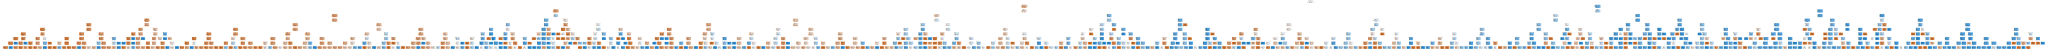

In [16]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
import os
from sklearn import tree

import os
os.environ["PATH"] += os.pathsep + 'C:/Users/als/Anaconda3/Library/bin/graphviz'

from IPython.display import HTML
style = "<style>svg{width:20% !important;height:20% !important;}</style>"
HTML(style)

graph = Source(tree.export_graphviz(grsrch_dt.best_estimator_, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Negative','Positive'],
                                   filled = True))

display(SVG(graph.pipe(format='svg')))